In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [2]:
# RBF Kernel
def rbf_kernel(X, centers, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(X[:, np.newaxis] - centers, axis=2)**2)


In [3]:
# RBF Network class
class RBFNetwork:
    def __init__(self, n_centers=10, gamma=1.0):
        self.n_centers = n_centers
        self.gamma = gamma
        self.centers = None
        self.coefficients = None

    def fit(self, X, y):
        np.random.seed(42)
        self.centers = X[np.random.choice(X.shape[0], self.n_centers, replace=False)]
        X_rbf = rbf_kernel(X, self.centers, self.gamma)
        regressor = LinearRegression()
        regressor.fit(X_rbf, y)
        self.coefficients = regressor.coef_.flatten()
        self.intercept = regressor.intercept_

    def predict(self, X):
        X_rbf = rbf_kernel(X, self.centers, self.gamma)
        return np.dot(X_rbf, self.coefficients) + self.intercept


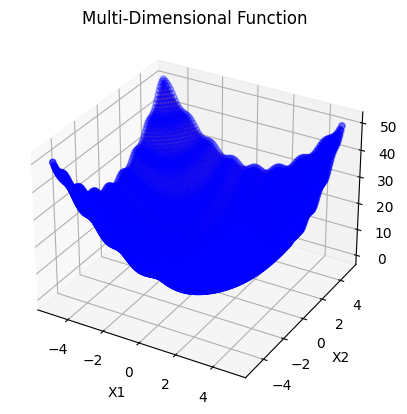

Mean Squared Error for Multi-Dimensional function: 0.4808213840725117


In [4]:
# Example 2: Multi-Dimensional function y = x1^2 + x2^2 + sin(x1 * x2)
X1 = np.linspace(-5, 5, 100)
X2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(X1, X2)

# Flatten the meshgrid arrays to create a dataset with shape (10000, 2)
X = np.vstack([X1.ravel(), X2.ravel()]).T

# Compute the target values y (flattened)
y = X1.ravel()**2 + X2.ravel()**2 + np.sin(X1.ravel() * X2.ravel())

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train RBF Network
rbf_network = RBFNetwork(n_centers=30, gamma=0.1)
rbf_network.fit(X_scaled, y)

# Make predictions
y_pred = rbf_network.predict(X_scaled)

# Reshape prediction for plotting (back to the grid shape)
y_pred = y_pred.reshape(X1.shape)

# Visualize the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='blue', label='True values')
ax.plot_surface(X1, X2, y_pred, color='red', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title("Multi-Dimensional Function")
plt.show()

# Evaluate the model
mse = mean_squared_error(y, y_pred.ravel())
print(f"Mean Squared Error for Multi-Dimensional function: {mse}")
